In [45]:
import pandas as pd
import seaborn as sns


In [2]:
tweets_df=pd.read_csv("tweets_df.csv")

In [3]:
tabla_tweets=tweets_df[["ID","Text","Date","Author ID","Retweets","Replies","Likes","Quotes"]]
tabla_usuarios=tweets_df[["Author ID","Author Name","Author Username"]]

Realizar un pequeño análisis donde se respondan a las siguientes preguntas de negocio:

In [6]:
#a. ¿Cuál es el tweet con mayor repercusión social?
print(tabla_tweets[tabla_tweets["Retweets"]==tabla_tweets["Retweets"].max()])
print(tabla_tweets[tabla_tweets["Replies"]==tabla_tweets["Replies"].max()])
print(tabla_tweets[tabla_tweets["Likes"]==tabla_tweets["Likes"].max()])
print(tabla_tweets[tabla_tweets["Quotes"]==tabla_tweets["Quotes"].max()])

#El tweet con más retweets, más likes y más quotes es el 51. El que tiene más replies es el 42, pero sólo tiene 1 más que el 51. Así que el 51 es el tweet con mayor repercusión social
#Además el segundo tweet con más retweets (el 128) tiene sólo 12  y el segundo tweet con más likes (128 también) tiene sólo 21.
#Podríamos decir que el segundo tweet más popular es el 128

                     ID                                               Text   
51  1645201576217157637  Para reactivarse!!!\nTenemos Meetup este marte...  \

          Date            Author ID  Retweets  Replies  Likes  Quotes  
51  2023-04-09  1207228796593745920        25        3     39       4  
                     ID                                               Text   
42  1648038694387871801  Untagged Day - El evento de analítica digital ...  \

          Date  Author ID  Retweets  Replies  Likes  Quotes  
42  2023-04-17   20979418         3        4     19       0  
                     ID                                               Text   
51  1645201576217157637  Para reactivarse!!!\nTenemos Meetup este marte...  \

          Date            Author ID  Retweets  Replies  Likes  Quotes  
51  2023-04-09  1207228796593745920        25        3     39       4  
                     ID                                               Text   
51  1645201576217157637  Para reactivar

In [12]:
tabla_tweets["Quotes"].sort_values(ascending=False)

51     4
11     3
116    2
0      1
16     1
      ..
10     0
50     0
49     0
48     0
78     0
Name: Quotes, Length: 143, dtype: int64

In [24]:
#b. ¿Cuál es el usuario que más menciona a la escuela?
tweets_df["Author Name"].value_counts()

Author Name
The Bridge                                         45
DatabeerSVQ                                        17
Mario Lopez de Avila                                9
Asociación de Estudiantes de Software Libre UPO     6
Decentralized ₿丰⚡                                   5
Toni Dorta                                          4
espacio_RES                                         4
Iñaki Gorostiza                                     4
Pau Mugarra                                         4
Flor_Turoninos                                      3
My Tech Plan                                        3
María Blanco                                        3
MIL Madrid - Madrid Innovation Lab                  2
Pat Nar                                             2
Alejandro de Otero ⚡️                               2
Carlos M. Diaz                                      2
J. A. Vizcaíno Jiménez                              2
Jorge Ordovás                                       2
Metricool ES ∞  

In [29]:
#c. ¿En qué mes se concentra el mayor número de tweets?
tweets_df["Date"] = pd.to_datetime(tweets_df["Date"])

        # Extraer el año, mes y día en columnas separadas
tweets_df["Date_Year"] = tweets_df["Date"].dt.year
tweets_df["Date_Month"] = tweets_df["Date"].dt.month
tweets_df["Date_Day"] = tweets_df["Date"].dt.day

tweets_df["Date_Month"].value_counts(ascending=False)

#El mes con más tweets es marzo

Date_Month
3    73
4    38
5    19
2    13
Name: count, dtype: int64

In [36]:
#d. ¿Qué palabras son más frecuentes?
all_text = ' '.join(tweets_df['Text'].tolist())
all_text

'Ayer visitamos a los alumnos de @TheBridge_Tech  para charlar con ellos sobre las capacidades en prevención y detección de #ciberseguridad de @a3sec  y compartir experiencias que les puedan ayudar en su incorporación al mundo laboral.\n¡Gracias por la invitación! https://t.co/r1YVULrSOl ¿Qué hacían nuestros alumni antes del #bootcamp?\n\nAsí fue el Open Day de #Sevilla donde compartieron su experiencia, dudas, miedos y sus ganas de hacer un cambio en su carrera 🚀\n\n¿Ready para el cambio?\n\n¡Últimas plazas!👉https://t.co/4DRdoJhQqv\n\n@camaradesevilla @ENCamaraSevilla https://t.co/6VJRsx67Fx #MLMonitoring and #Observability, mar, 23 may 2023, 18:30   | Meetup https://t.co/VEq7ZN3Plr\n¡2º encuentro de la @mlopscommunity en @TheBridge_Tech ! Acompáñanos para aprender de nuestros amigos de @wayflyerapp @wallapop @argilla_io Registro gratuito, plazas limitadas. https://t.co/Zw5bKGP0av Nos colamos en el campus de #Bilbao para descubrir más sobre #BBKBootcampsPoweredByTheBridge 😍\n\nEcha un

In [38]:
from collections import Counter

word_counts = Counter(all_text.split())
word_counts

Counter({'Ayer': 2,
         'visitamos': 1,
         'a': 91,
         'los': 21,
         'alumnos': 1,
         'de': 193,
         '@TheBridge_Tech': 93,
         'para': 40,
         'charlar': 1,
         'con': 40,
         'ellos': 1,
         'sobre': 17,
         'las': 46,
         'capacidades': 1,
         'en': 120,
         'prevención': 1,
         'y': 94,
         'detección': 2,
         '#ciberseguridad': 4,
         '@a3sec': 1,
         'compartir': 3,
         'experiencias': 1,
         'que': 40,
         'les': 1,
         'puedan': 1,
         'ayudar': 1,
         'su': 11,
         'incorporación': 1,
         'al': 17,
         'mundo': 1,
         'laboral.': 1,
         '¡Gracias': 1,
         'por': 30,
         'la': 77,
         'invitación!': 1,
         'https://t.co/r1YVULrSOl': 1,
         '¿Qué': 1,
         'hacían': 1,
         'nuestros': 10,
         'alumni': 3,
         'antes': 1,
         'del': 22,
         '#bootcamp?': 1,
         'Así

In [40]:
most_common_words = word_counts.most_common()
most_common_words

#Obviamente las palabras más repetidas son conjunciones y preposiciones. También hay algunas menciones y después las palabras "bootcamp" y "Entradas"

[('de', 193),
 ('en', 120),
 ('y', 94),
 ('@TheBridge_Tech', 93),
 ('a', 91),
 ('la', 77),
 ('el', 68),
 ('las', 46),
 ('para', 40),
 ('con', 40),
 ('que', 40),
 ('por', 30),
 ('lo', 27),
 ('un', 24),
 ('se', 24),
 ('del', 22),
 ('los', 21),
 ('una', 21),
 ('👉', 21),
 ('te', 21),
 ('@sngular', 20),
 ('es', 18),
 ('sobre', 17),
 ('al', 17),
 ('h', 16),
 ('nos', 15),
 ('#bootcamp', 14),
 ('Entradas', 14),
 ('más', 12),
 ('edición', 12),
 ('qué', 12),
 ('tu', 12),
 ('¡No', 12),
 ('pierdas!', 12),
 ('o', 12),
 ('@PauMugarra', 12),
 ('@opensistemas', 12),
 ('su', 11),
 ('Gracias', 11),
 ('19.00', 11),
 ('nuestros', 10),
 ('mayo', 10),
 ('no', 10),
 ('Para', 10),
 ('@SVQ_tech', 10),
 ('marzo', 10),
 ('@SingularSolving', 10),
 ('@BBK_eus', 9),
 ('este', 9),
 ('Y', 9),
 ('próximo', 9),
 ('💻Online', 9),
 ('vemos', 9),
 ('abril', 9),
 ('ya', 9),
 ('@ToniDorta', 9),
 ('carrera', 8),
 ('jueves', 8),
 ('La', 8),
 ('todo', 8),
 ('como', 7),
 ('at', 7),
 ('Sevilla', 7),
 ('¡Te', 7),
 ('taller', 7),
 

In [47]:
tabla_tweets.columns

Index(['ID', 'Text', 'Date', 'Author ID', 'Retweets', 'Replies', 'Likes',
       'Quotes'],
      dtype='object')

<Axes: >

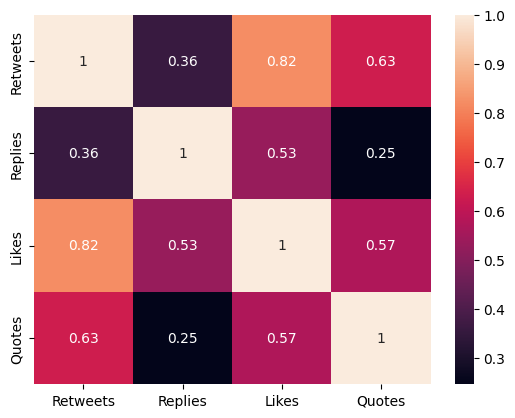

In [48]:
#e. ¿Qué tipo de correlación matemática encuentras entre las métricas públicas?
metricas=tabla_tweets[["Retweets","Replies","Likes","Quotes"]]
sns.heatmap(metricas.corr(),annot=True)


In [ ]:
#f. ¿Has sacado alguna conclusión extra en tu análisis?

#Se aprecian bastantes diferencias entre las métricas de los tweets escritos por The_Bridge y los que le citan

In [50]:
tweets_tb=tweets_df[tweets_df["Author Name"]=="The Bridge"]
tweets_others=tweets_df[tweets_df["Author Name"]!="The Bridge"]

In [54]:
tweets_tb_metrics=tweets_tb[["Retweets","Replies","Likes","Quotes"]]
tweets_others_metrics=tweets_others[["Retweets","Replies","Likes","Quotes"]]

<Axes: >

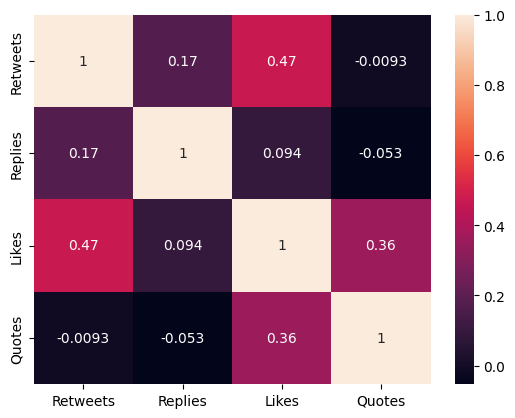

In [55]:
sns.heatmap(tweets_tb_metrics.corr(),annot=True)

<Axes: >

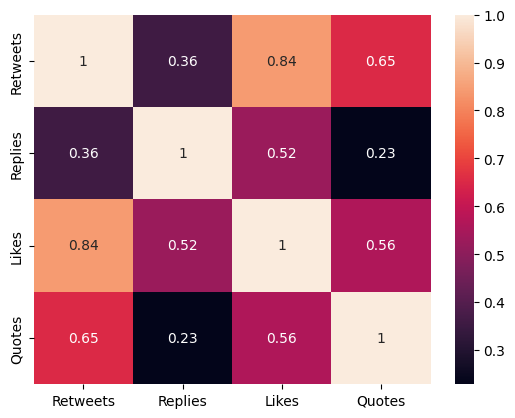

In [56]:
sns.heatmap(tweets_others_metrics.corr(),annot=True)

In [67]:
print("Métricas tweets de The_Bridge")
print("Retweets Max: ",tweets_tb["Retweets"].max(),"   Mean: ",round(tweets_tb["Retweets"].mean(),2))
print("Replies Max: ",tweets_tb["Replies"].max(),"   Mean: ",round(tweets_tb["Replies"].mean(),2))
print("Likes Max: ", tweets_tb["Likes"].max(),"   Mean: ",round(tweets_tb["Likes"].mean(),2))
print("Quotes Max: ",tweets_tb["Quotes"].max(),"   Mean: ",round(tweets_tb["Quotes"].mean(),2))
print("*"*5)
print("Métricas tweets de Otros")
print("Retweets Max: ",tweets_others["Retweets"].max(),"   Mean: ",round(tweets_others["Retweets"].mean(),2))
print("Replies Max: ",tweets_others["Replies"].max(),"   Mean: ",round(tweets_others["Replies"].mean(),2))
print("Likes Max: ", tweets_others["Likes"].max(),"   Mean: ",round(tweets_others["Likes"].mean(),2))
print("Quotes Max: ",tweets_others["Quotes"].max(),"   Mean: ",round(tweets_others["Quotes"].mean(),2))

Métricas tweets de The_Bridge
Retweets Max:  5    Mean:  1.07
Replies Max:  1    Mean:  0.11
Likes Max:  5    Mean:  1.84
Quotes Max:  1    Mean:  0.02
*****
Métricas tweets de Otros
Retweets Max:  25    Mean:  1.65
Replies Max:  4    Mean:  0.46
Likes Max:  39    Mean:  4.28
Quotes Max:  4    Mean:  0.21
